In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from itertools import combinations

In [40]:
df = pd.read_csv('gavote.csv')

In [41]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  159 non-null    object 
 1   equip       159 non-null    object 
 2   econ        159 non-null    object 
 3   perAA       159 non-null    float64
 4   rural       159 non-null    object 
 5   atlanta     159 non-null    object 
 6   gore        159 non-null    int64  
 7   bush        159 non-null    int64  
 8   other       159 non-null    int64  
 9   votes       159 non-null    int64  
 10  ballots     159 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.8+ KB


(            perAA           gore           bush        other          votes  \
 count  159.000000     159.000000     159.000000   159.000000     159.000000   
 mean     0.242981    7020.314465    8929.056604   381.654088   16331.025157   
 std      0.163082   19317.779818   18029.959822  1150.974980   36623.274439   
 min      0.000000     249.000000     271.000000     5.000000     832.000000   
 25%      0.111500    1385.500000    1803.500000    30.000000    3506.500000   
 50%      0.233000    2326.000000    3597.000000    86.000000    6299.000000   
 75%      0.348000    4430.000000    7468.500000   210.000000   11846.500000   
 max      0.765000  154509.000000  140494.000000  7920.000000  263211.000000   
 
              ballots  
 count     159.000000  
 mean    16926.503145  
 std     37865.152282  
 min       881.000000  
 25%      3693.500000  
 50%      6712.000000  
 75%     12251.000000  
 max    280975.000000  ,
 None)

In [42]:
df.shape

(159, 11)

##Data Vizualization

In [43]:
df.head()

,Unnamed: 0,equip,econ,perAA,rural,atlanta,gore,bush,other,votes,ballots
0,APPLING,LEVER,poor,0.182,rural,notAtlanta,2093,3940,66,6099,6617
1,ATKINSON,LEVER,poor,0.230,rural,notAtlanta,821,1228,22,2071,2149
2,BACON,LEVER,poor,0.131,rural,notAtlanta,956,2010,29,2995,3347
3,BAKER,OS-CC,poor,0.476,rural,notAtlanta,893,615,11,1519,1607
4,BALDWIN,LEVER,middle,0.359,rural,notAtlanta,5893,6041,192,12126,12785


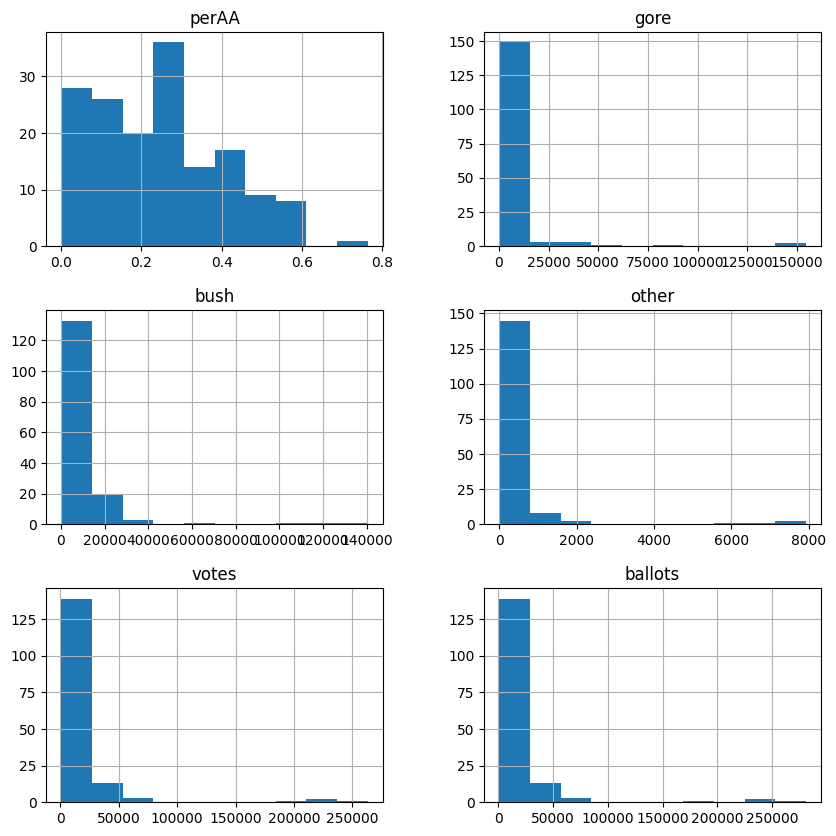

In [44]:
df.hist(figsize=(10,10))
plt.show()

In [45]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [46]:
df.head()

,equip,econ,perAA,rural,atlanta,gore,bush,other,votes,ballots
0,LEVER,poor,0.182,rural,notAtlanta,2093,3940,66,6099,6617
1,LEVER,poor,0.230,rural,notAtlanta,821,1228,22,2071,2149
2,LEVER,poor,0.131,rural,notAtlanta,956,2010,29,2995,3347
3,OS-CC,poor,0.476,rural,notAtlanta,893,615,11,1519,1607
4,LEVER,middle,0.359,rural,notAtlanta,5893,6041,192,12126,12785


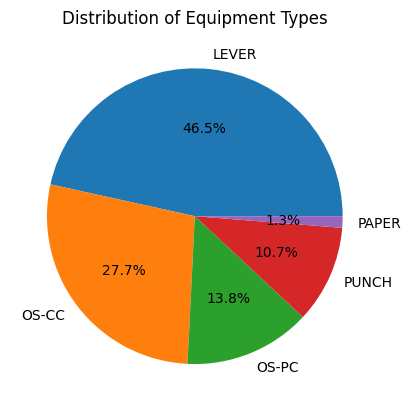

In [47]:
equip_counts = df['equip'].value_counts()
plt.pie(equip_counts, labels=equip_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Equipment Types')
plt.show()

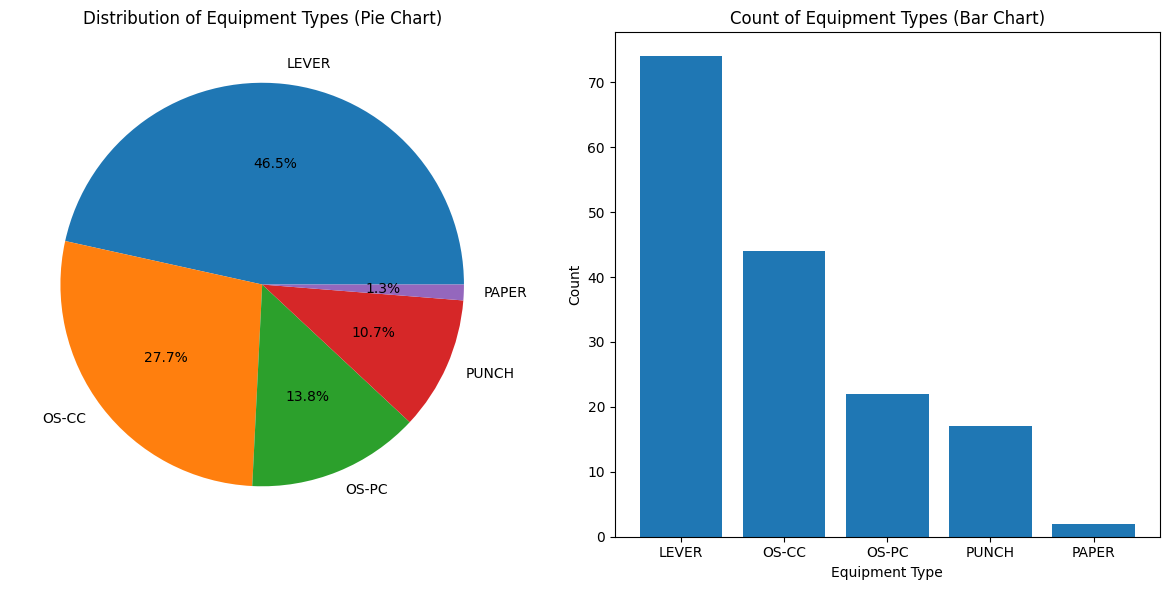

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # 1 row, 2 columns

# Plot 1 ( pie chart)
axes[0].pie(equip_counts, labels=equip_counts.index, autopct='%1.1f%%')
axes[0].set_title('Distribution of Equipment Types (Pie Chart)')

# Plot 2 (bar chart)
axes[1].bar(equip_counts.index, equip_counts.values)
axes[1].set_xlabel('Equipment Type')
axes[1].set_ylabel('Count')
axes[1].set_title('Count of Equipment Types (Bar Chart)')

plt.tight_layout() # Adjust layout to prevent overlapping labels
plt.show()

In [49]:
under_counts = df['ballots'] - df['votes']

norm_under_counts = under_counts/df['ballots']
norm_under_counts

0      0.078283
1      0.036296
2      0.105169
3      0.054760
4      0.051545
         ...   
154    0.023141
155    0.026749
156    0.026596
157    0.013713
158    0.061474
Length: 159, dtype: float64

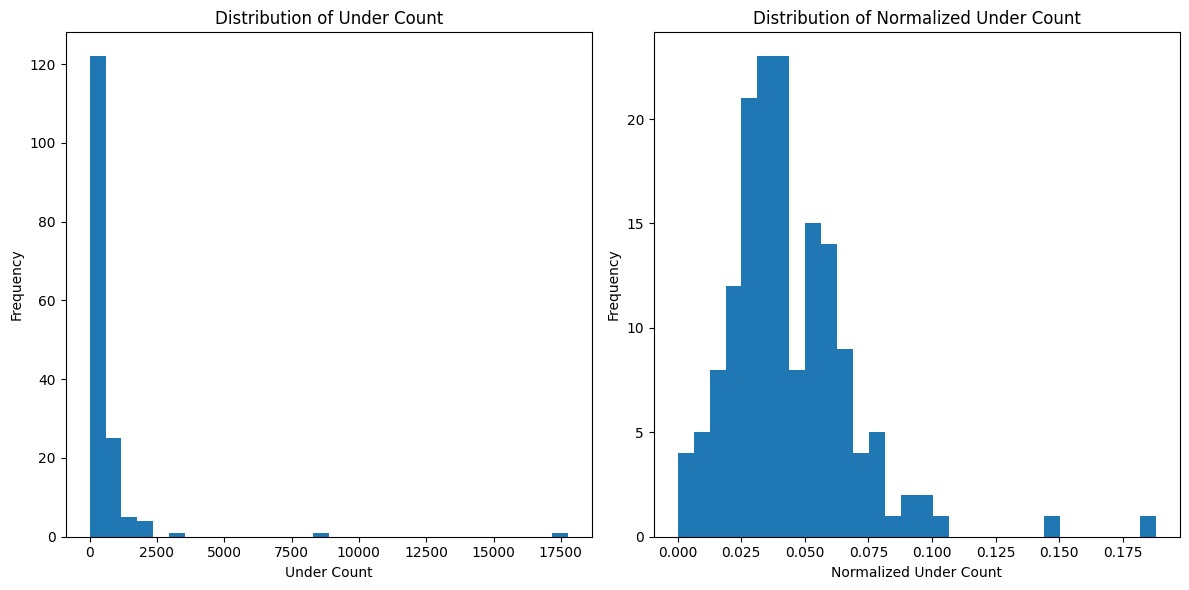

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # 1 row, 2 columns

# Plot 1
axes[0].hist(under_counts.values,bins=30) # Pass the values as data
axes[0].set_xlabel('Under Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Under Count')

# Plot 2
axes[1].hist(norm_under_counts.values,bins=30) # Pass the values as data
axes[1].set_xlabel('Normalized Under Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Normalized Under Count')

plt.tight_layout() # Adjust layout to prevent overlapping labels
plt.show()

In [51]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

<Axes: >

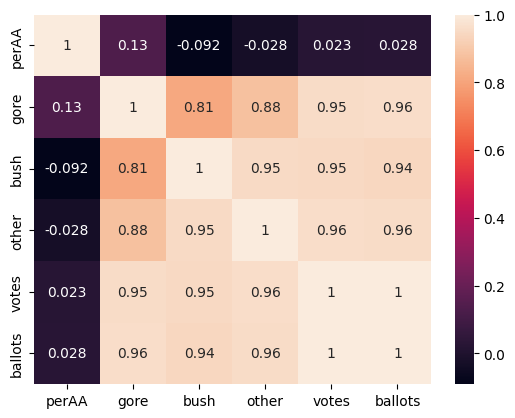

In [52]:
sns.heatmap(df[numerical_columns].corr(), annot=True)

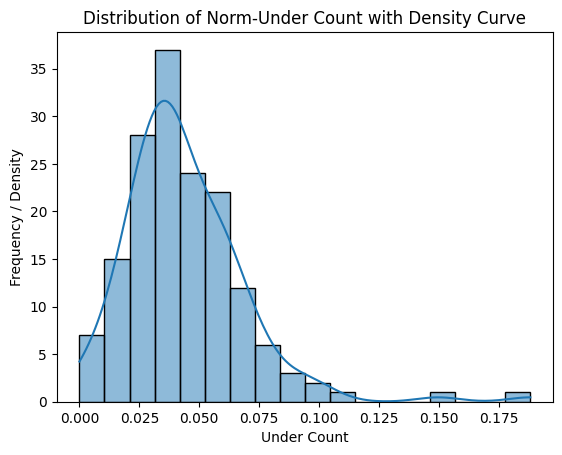

In [53]:
sns.histplot(data=df, x=norm_under_counts, kde=True, bins='auto')
plt.xlabel('Under Count')
plt.ylabel('Frequency / Density')
plt.title('Distribution of Norm-Under Count with Density Curve')
plt.show()

Text(0.5, 1.0, 'Box Plot of Under-counts by Equipment')

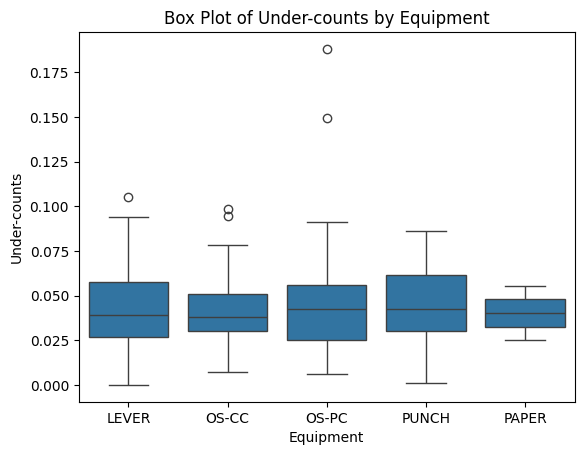

In [54]:
sns.boxplot(data=df, x='equip', y=norm_under_counts.values)
plt.xlabel('Equipment')
plt.ylabel('Under-counts')
plt.title('Box Plot of Under-counts by Equipment')

In [55]:
norm_under_counts.median()

np.float64(0.03983313147624815)

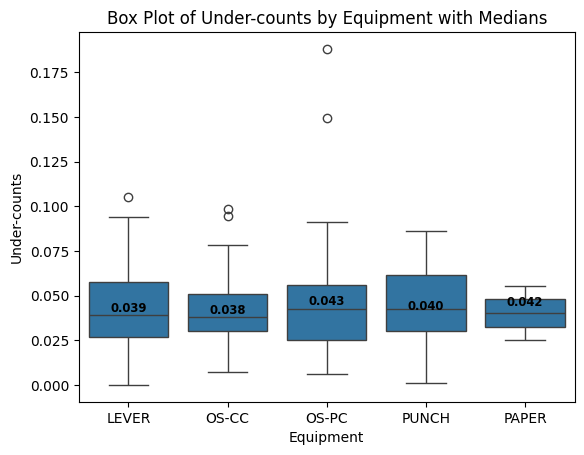

In [56]:
# Add under_counts and norm_under_counts as columns to the DataFrame if they don't exist
if 'under_counts' not in df.columns:
    df['under_counts'] = df['ballots'] - df['votes']
if 'norm_under_counts' not in df.columns:
    df['norm_under_counts'] = norm_under_counts

# Create the boxplot
ax = sns.boxplot(data=df, x='equip', y='norm_under_counts')
plt.xlabel('Equipment')
plt.ylabel('Under-counts')
plt.title('Box Plot of Under-counts by Equipment with Medians')

# Calculate medians for each equipment type
medians = df.groupby('equip')['norm_under_counts'].median()
vertical_offset = df['norm_under_counts'].median() * 0.05 # Adjust as needed for label placement

# Display medians on the plot
for xtick in ax.get_xticks():
    equip_type = medians.index[xtick]
    label = medians.loc[equip_type]
    ax.text(xtick, label + vertical_offset, f'{label:.3f}',
            horizontalalignment='center', size='small', color='black', weight='semibold')

plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd


X = df.drop(['under_counts'], axis=1, errors='ignore')

# Perform one-hot encoding on categorical columns and update X
X = pd.get_dummies(X, columns=['equip', 'econ', 'rural', 'atlanta'], drop_first=True)

# Convert boolean columns to integers 
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Add  (intercept) to the model
X_with_const = add_constant(X, has_constant='add') 


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]


print(vif_data)

               Feature          VIF
0                const    46.720120
1                perAA     1.879174
2                 gore          inf
3                 bush          inf
4                other          inf
5                votes          inf
6              ballots  4652.978272
7    norm_under_counts     1.589964
8          equip_OS-CC     1.374186
9          equip_OS-PC     1.538096
10         equip_PAPER     1.032554
11         equip_PUNCH     1.476723
12           econ_poor     2.098935
13           econ_rich     2.373392
14         rural_urban     1.732306
15  atlanta_notAtlanta     2.849658


c:\Users\DS-31\Desktop\Practice_438\438\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [153]:
scaler = StandardScaler()
df1 = pd.get_dummies(df, columns=['equip','econ','rural','atlanta'])
X=df1.drop(['under_counts','gore','bush','other','votes','ballots'],axis=1)
#X = df1[['equip_LEVER', 'equip_OS-CC', 'equip_OS-PC', 'equip_PAPER', 'equip_PUNCH', 'econ_middle', 'econ_poor', 'econ_rich', 'rural_rural', 'rural_urban', 'atlanta_Atlanta', 'atlanta_notAtlanta']]
y = df1['under_counts']
X= scaler.fit_transform(X)  # Scale X
y = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()  # Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [154]:

lr =LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [155]:
lr.coef_,lr.intercept_

(array([ 0.23321877,  0.16722327, -0.03595731, -0.07034076, -0.05721762,
        -0.01850572,  0.23048947,  0.22193054, -0.09047918, -0.20500585,
        -0.05196068,  0.05196068,  0.27613822, -0.27613822]),
 np.float64(0.03408063867131923))

In [156]:
lr.predict(X_test)

array([ 0.26157856, -0.55965168, -0.09867143,  0.64988211,  0.05860763,
       -0.0247723 , -0.45964445, -0.71537177, -0.20330279,  0.72105728,
       -0.15858666, -0.35810206, -0.00492212, -0.26074449,  0.30476317,
        3.38614117, -0.10619065,  0.00860157, -0.23686554, -0.18481756,
       -0.17825774,  1.08386836, -0.59714221, -0.95359268,  0.09706521,
        0.25308118,  0.18803588, -0.18131744, -0.03116203, -0.23618042,
        0.25343784, -0.09293012])

In [157]:
mean_squared_error(y_test,lr.predict(X_test))

0.39959531387756164

In [158]:
r2_score(y_train,lr.predict(X_train))

0.43001706375249005

In [159]:
df1.head()

,perAA,gore,bush,other,votes,ballots,under_counts,norm_under_counts,equip_LEVER,equip_OS-CC,equip_OS-PC,equip_PAPER,equip_PUNCH,econ_middle,econ_poor,econ_rich,rural_rural,rural_urban,atlanta_Atlanta,atlanta_notAtlanta
0,0.182,2093,3940,66,6099,6617,518,0.078283,True,False,False,False,False,False,True,False,True,False,False,True
1,0.230,821,1228,22,2071,2149,78,0.036296,True,False,False,False,False,False,True,False,True,False,False,True
2,0.131,956,2010,29,2995,3347,352,0.105169,True,False,False,False,False,False,True,False,True,False,False,True
3,0.476,893,615,11,1519,1607,88,0.054760,False,True,False,False,False,False,True,False,True,False,False,True
4,0.359,5893,6041,192,12126,12785,659,0.051545,True,False,False,False,False,True,False,False,True,False,False,True


In [ ]:
# # Get the coefficients from the fitted model
# coefficients = lr.coef_
# if isinstance(X_train, np.ndarray):
#     X_train_df = pd.DataFrame(X_train, columns=feature_names)
# else:
#     X_train_df = X_train
# # Get the feature names from the training data
# feature_names = X_train_df.columns

# # Create a pandas Series to associate feature names with coefficients
# feature_importance = pd.Series(abs(coefficients), index=feature_names)

# # Sort the feature importance in descending order
# sorted_feature_importance = feature_importance.sort_values(ascending=False)

# # Display the sorted feature importance
# print("Feature Importance (Absolute Coefficients):")
# display(sorted_feature_importance)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

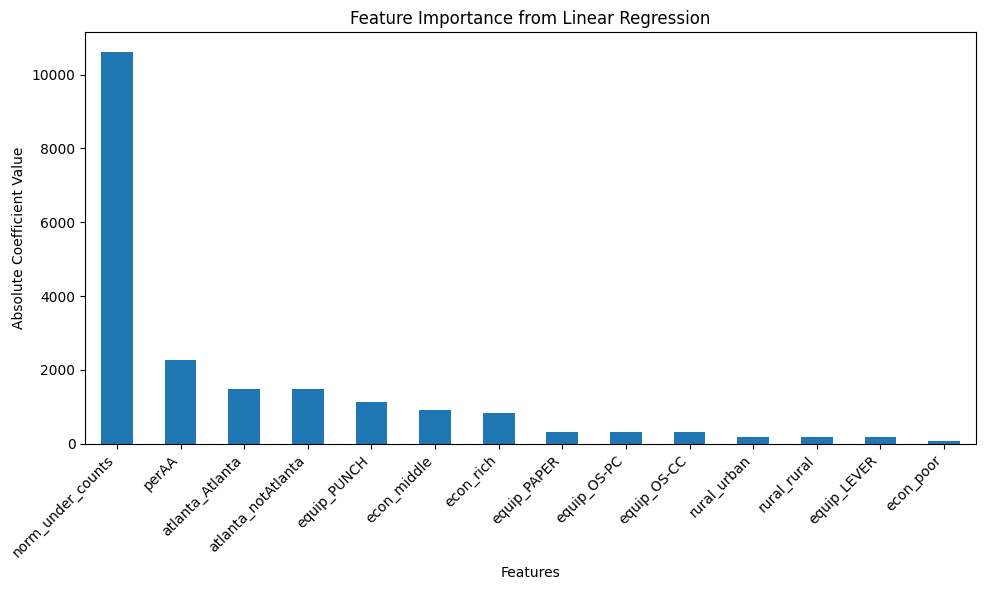

In [ ]:
plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind='bar')
plt.title('Feature Importance from Linear Regression')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
model = LinearRegression()
#Forward selection
def forward_selection(X_train, y_train, model):
    remaining_features = list(X_train.columns)  # List of all feature names
    selected_features = []  # Start with no features selected
    best_score = -np.inf  # Initialize best score to a very low value
    
    # Loop until no more features improve the model
    while remaining_features:
        scores_with_candidates = []
        
        # Test adding each feature from the remaining set
        for feature in remaining_features:
            # Create a new set of features by adding the candidate feature
            X_train_subset = X_train[selected_features + [feature]]
            
            # Evaluate the model performance using cross-validation with R² score
            score = cross_val_score(model, X_train_subset, y_train, cv=5, scoring='r2')
            mean_score = np.mean(score)  # Higher score is better
            
            # Store the result with the feature being tested
            scores_with_candidates.append((mean_score, feature))
        
        # Sort by R² score (highest first)
        scores_with_candidates.sort(reverse=True, key=lambda x: x[0])
        
        # Get the best feature and score
        best_new_score, best_feature = scores_with_candidates[0]
        
        # If adding this feature improves the score, include it in the model
        if best_new_score > best_score:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_score = best_new_score
        else:
            break  # No improvement, stop the process
    
    return selected_features, best_score
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=feature_names)
else:
    X_train_df = X_train
# Run forward selection using the DataFrame with column names
best_features, best_r2_score = forward_selection(X_train_df, y_train, model)

# Display the selected features and the best R² score
print(f"Selected features using Forward Selection: {best_features}")
print(f"Best R² score achieved: {best_r2_score}")

Selected features using Forward Selection: ['econ_poor']
Best R² score achieved: -0.2810644739389669


In [ ]:
np.random.normal         

In [ ]:
import statsmodels.api as sm

# Backward Elimination
def backward_elimination(X_train, y_train, model):
    # Converting boolean columns to int 
    X_train_numeric = X_train.copy()
    for col in X_train_numeric.select_dtypes(include=['bool']).columns:
        X_train_numeric[col] = X_train_numeric[col].astype(int)

    remaining_features = list(X_train_numeric.columns)
    best_score = -np.inf

    while len(remaining_features) > 0:
        scores_with_candidates = []
        for feature in remaining_features:
            X_train_subset = X_train_numeric[remaining_features].drop(feature, axis=1)
            # Train model and evaluate performance
            model_fit = sm.OLS(y_train, sm.add_constant(X_train_subset)).fit()
            score = model_fit.rsquared
            scores_with_candidates.append((score, feature))

        # Sort by the worst performing feature (lowest score)
        scores_with_candidates.sort()
        worst_score, worst_feature = scores_with_candidates[0]
        #better_score, best_feature = max(scores_with_candidates, key=lambda x: x[0])

        # Remove the worst feature and check the new model score
        remaining_features.remove(worst_feature)
        print(scores_with_candidates)

        if worst_score > best_score:
            best_score = worst_score
        else:
            break

    return remaining_features, best_score


# Convert X_train (numpy array) to DataFrame with feature names if needed
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=feature_names)
else:
    X_train_df = X_train

best_features_backward, best_score_backward = backward_elimination(X_train_df, y_train, model)
print(f"Selected features using Backward Elimination: {best_features_backward}")
print(f"Best R² score achieved: {best_score_backward}")


[(np.float64(0.4030055492252457), 'perAA'), (np.float64(0.41370139567057507), 'norm_under_counts'), (np.float64(0.43001706375249005), 'rural_urban'), (np.float64(0.43001706375249016), 'atlanta_Atlanta'), (np.float64(0.43001706375249016), 'atlanta_notAtlanta'), (np.float64(0.43001706375249016), 'equip_LEVER'), (np.float64(0.43001706375249016), 'equip_OS-CC'), (np.float64(0.43001706375249016), 'equip_OS-PC'), (np.float64(0.43001706375249016), 'equip_PUNCH'), (np.float64(0.43001706375249016), 'rural_rural'), (np.float64(0.43001706375249027), 'econ_middle'), (np.float64(0.43001706375249027), 'econ_poor'), (np.float64(0.43001706375249027), 'econ_rich'), (np.float64(0.43001706375249027), 'equip_PAPER')]
[(np.float64(0.3884190166670025), 'norm_under_counts'), (np.float64(0.40300554922524556), 'atlanta_Atlanta'), (np.float64(0.40300554922524556), 'econ_middle'), (np.float64(0.40300554922524556), 'econ_poor'), (np.float64(0.40300554922524556), 'rural_rural'), (np.float64(0.40300554922524556), '

In [ ]:
model = LinearRegression()

# Best Subset Selection using Cross-Validation
best_score = -np.inf
best_combination = None


for k in range(1, X_train.shape[1] + 1):  # k: the number of features in the subset
    for subset in combinations(X_train.columns, k):
        X_train_subset = X_train[list(subset)]

        # Perform Cross-Validation (using negative MSE)
        score = cross_val_score(model, X_train_subset, y_train, cv=5, scoring='r2')
        mean_score = np.mean(score)  

        # the best combination
        if mean_score > best_score:
            best_score = mean_score
            best_combination = subset


print(f"Best subset of features: {best_combination}")

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Get the coefficients from the Lasso model
lasso_coefficients = lasso.coef_

# Create a pandas Series to associate feature names with coefficients
lasso_feature_importance = pd.Series(lasso_coefficients, index=X.columns)

# Display the coefficients
print("Lasso Coefficients:")
display(lasso_feature_importance.sort_values(ascending=False))

# Predict on the test set
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\nLasso Regression Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression R-squared: {r2_lasso}")

Lasso Coefficients:


c:\Users\DS-31\Desktop\Practice_438\438\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.285e+06, tolerance: 3.886e+04
  model = cd_fast.enet_coordinate_descent(


atlanta_Atlanta       9.042482e+02
econ_middle           5.243427e+02
equip_PUNCH           3.940790e+02
perAA                 3.736232e+02
norm_under_counts     2.694877e+02
econ_poor             3.293053e+01
equip_LEVER           4.010065e+00
rural_urban           9.017864e-12
atlanta_notAtlanta   -3.196381e-11
equip_PAPER          -1.736374e+01
equip_OS-PC          -4.970570e+01
equip_OS-CC          -5.473287e+01
rural_rural          -1.661681e+02
econ_rich            -2.273426e+02
dtype: float64


Lasso Regression Mean Squared Error: 996303.1137417804
Lasso Regression R-squared: -3.8199035439103985


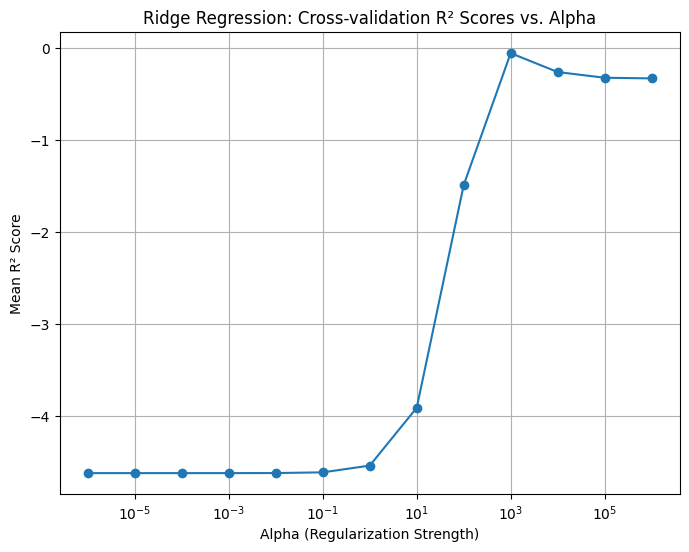

Best alpha: 1000.0
Test set R² score: 0.11696657402993194


In [ ]:
from sklearn.linear_model import Ridge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge regression model
ridge = Ridge()

# Perform cross-validation to select the optimal alpha (regularization strength)
alphas = np.logspace(-6, 6, 13)  # Explore a range of alpha values (log scale)
cv_scores = []

for alpha in alphas:
    ridge.alpha = alpha  # Set the alpha value
    score = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2')  # R² as scoring
    cv_scores.append(np.mean(score))  # Store the average R² score

# Plot the cross-validation results to find the best alpha
plt.figure(figsize=(8, 6))
plt.plot(alphas, cv_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean R² Score')
plt.title('Ridge Regression: Cross-validation R² Scores vs. Alpha')
plt.grid(True)
plt.show()

# Find the best alpha (maximum R² score)
best_alpha = alphas[np.argmax(cv_scores)]
print(f"Best alpha: {best_alpha}")

# Fit the model using the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
test_r2_score = ridge_best.score(X_test_scaled, y_test)
print(f"Test set R² score: {test_r2_score}")